### L1 norm : 가중치의 절대값의 합 (Mahattan Distance, Lasso)
    - robust, unstable solution, possibly multiple solution
### L2 norm : 가중치의 제곱합 (Euclidean Distance, Ridge)
    - not very robust, stable solution, always one solution
### L1 + L2 : Elastic net

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
from tensorflow.keras.datasets import cifar10

In [10]:
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.regularizers import l2

#### 데이터 로드

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#### 데이터 정규화

In [4]:
x_train = x_train/255
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [5]:
x_test = x_test/255
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

#### train set 1번째 이미지 확인

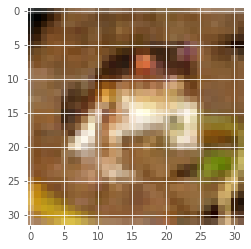

In [6]:
plt.imshow(x_train[0])
plt.show()
#개구리

#### y train 인코딩

In [7]:
y_trainone = to_categorical(y_train)

In [8]:
y_trainone.shape

(50000, 10)

In [9]:
x_train.shape

(50000, 32, 32, 3)

#### 학습

In [13]:
model = Sequential()

model.add( Conv2D( 32, kernel_size=(3,3), strides = 1, 
                  input_shape=(32,32,3), activation = 'relu', padding='same') )
model.add( Conv2D( 32, kernel_size =(3,3), activation='relu', kernel_regularizer=l2(0.001) ) )
model.add( MaxPool2D( pool_size=(2,2) ) )

model.add( Conv2D( 64, kernel_size=(3,3), strides = 1, input_shape=(32,32,3), activation = 'relu', padding='same') )
model.add( Conv2D( 64, kernel_size =(3,3), activation='relu', kernel_regularizer=l2(0.001) ) )
model.add( MaxPool2D( pool_size=(2,2) ) )

model.add( Conv2D( 128, kernel_size=(3,3), strides = 1, input_shape=(32,32,3), activation = 'relu', padding='same') )
model.add( Conv2D( 128, kernel_size =(3,3), activation='relu', kernel_regularizer=l2(0.001) ) )
model.add( MaxPool2D( pool_size=(2,2) ) )

model.add( Flatten( ) )

model.add( Dense( units=64, activation = 'relu', kernel_regularizer=l2(0.001) ) )
model.add( Dense( units=10, activation = 'softmax') )
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
h = model.fit( x_train, y_trainone, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 51s 40ms/step - loss: 1.7751 - acc: 0.3613 - val_loss: 1.5380 - val_acc: 0.4637
Epoch 2/10
1250/1250 [==============================] - 51s 40ms/step - loss: 1.3613 - acc: 0.5394 - val_loss: 1.2088 - val_acc: 0.6028
Epoch 3/10
1250/1250 [==============================] - 49s 39ms/step - loss: 1.1751 - acc: 0.6175 - val_loss: 1.0926 - val_acc: 0.6557
Epoch 4/10
1250/1250 [==============================] - 49s 39ms/step - loss: 1.0642 - acc: 0.6656 - val_loss: 1.0185 - val_acc: 0.6864
Epoch 5/10
1250/1250 [==============================] - 49s 39ms/step - loss: 0.9778 - acc: 0.7017 - val_loss: 0.9661 - val_acc: 0.7045
Epoch 6/10
1250/1250 [==============================] - 48s 39ms/step - loss: 0.9106 - acc: 0.7293 - val_loss: 0.9183 - val_acc: 0.7279
Epoch 7/10
1250/1250 [==============================] - 48s 38ms/step - loss: 0.8549 - acc: 0.7494 - val_loss: 0.9150 - val_acc: 0.7376
Epoch 8/10
1250/1250 [==========================

No handles with labels found to put in legend.


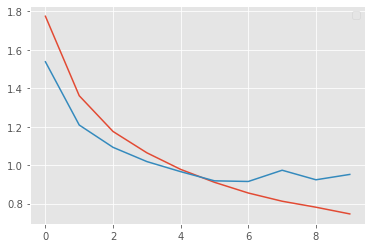

In [15]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.show()